In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [68]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/40.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.838017,0.997478,-0.530046,0.009328,3.763966,0.012110,1.022829
1,0.978950,0.752466,-0.037799,0.208774,2.883982,0.011261,1.182807
2,0.844313,0.005013,-0.538184,0.038119,3.754451,0.012153,1.015671
3,0.969540,0.751658,0.006568,0.121489,2.889557,0.011233,1.188787
4,0.835998,0.013682,-0.525788,0.035227,3.759048,0.012121,1.020916
...,...,...,...,...,...,...,...
14395,0.124653,0.717817,0.388697,0.178938,1.924383,0.009123,1.802158
14396,0.110450,0.724072,0.323064,0.168409,2.004056,0.009325,1.724948
14397,0.093965,0.731937,0.266630,0.166080,2.190705,0.009735,1.582714
14398,0.069290,0.736148,0.195531,0.170425,2.358517,0.010089,1.473513


<Axes: xlabel='x', ylabel='y'>

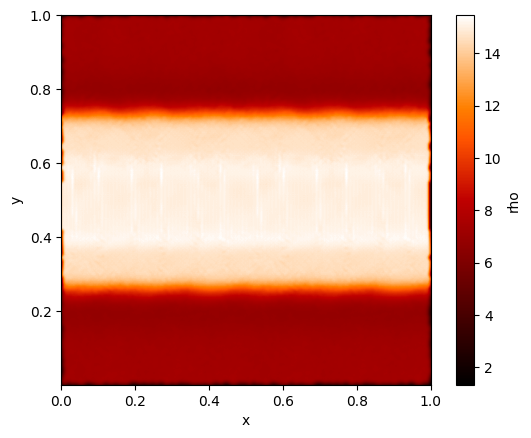

In [69]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [66]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/40.csv')
sdft

,x,y,vx,vy,u,h,rho
0,0.838017,0.997478,-0.530046,0.009328,3.763966,0.012110,1.022829
1,0.978950,0.752466,-0.037799,0.208774,2.883982,0.011261,1.182807
2,0.844313,0.005013,-0.538184,0.038119,3.754451,0.012153,1.015671
3,0.969540,0.751658,0.006568,0.121489,2.889557,0.011233,1.188787
4,0.835998,0.013682,-0.525788,0.035227,3.759048,0.012121,1.020916
...,...,...,...,...,...,...,...
14395,0.124653,0.717817,0.388697,0.178938,1.924383,0.009123,1.802158
14396,0.110450,0.724072,0.323064,0.168409,2.004056,0.009325,1.724948
14397,0.093965,0.731937,0.266630,0.166080,2.190705,0.009735,1.582714
14398,0.069290,0.736148,0.195531,0.170425,2.358517,0.010089,1.473513


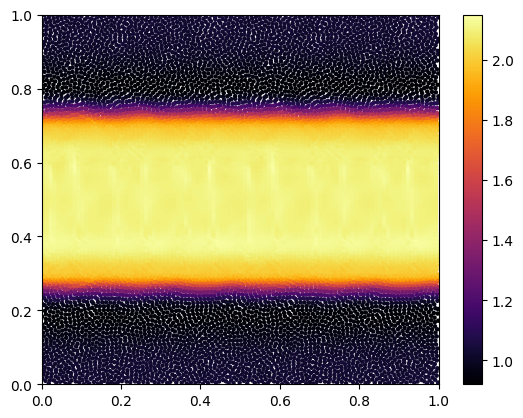

In [67]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.show()

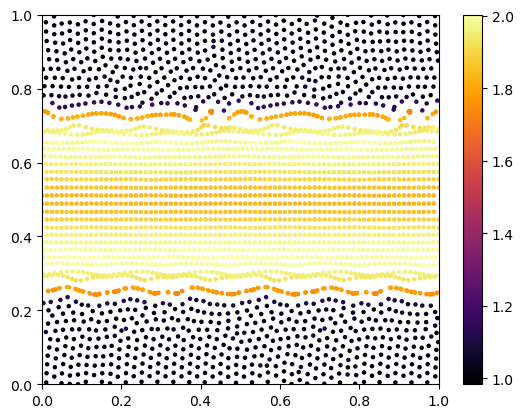

In [5]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 500
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

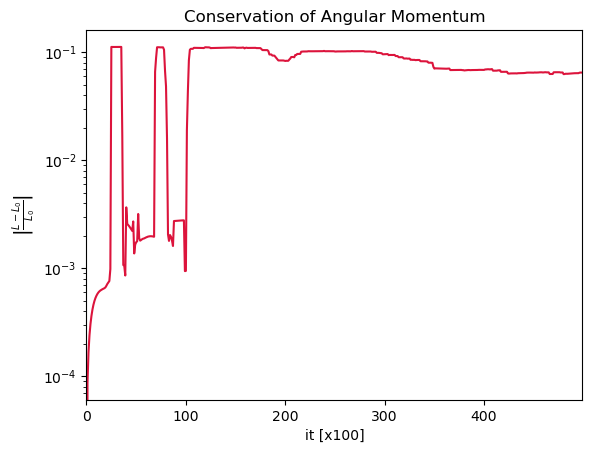

In [9]:
plt.plot(time[:], np.abs((ang_mom[:]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T-1)
plt.yscale("log")
plt.show()

# Conservation of Energy

In [10]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [11]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

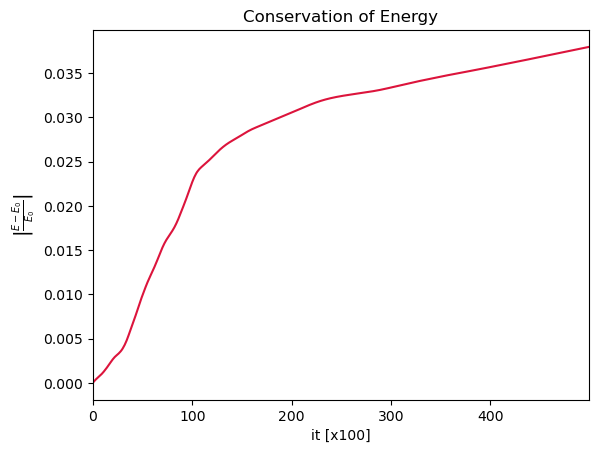

In [12]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()